
# **Running Pyspark in Colab**

To run spark in Colab, You need proper setup. Next cell will create required setup for running Spark/PySpark:

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:

# # Create SparkSession from builder
# import pyspark
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[1]") \
#                     .appName('SparkByExamples.com') \
#                     .getOrCreate()

In [3]:

spark.version



'3.0.0'

In [4]:
print(spark.sparkContext)
print("Spark App Name : "+ spark.sparkContext.appName)

<SparkContext master=local[*] appName=pyspark-shell>
Spark App Name : pyspark-shell


In [6]:
#
# SparkContext stop() method
spark.sparkContext.stop()


In [7]:

# Create SparkContext
from pyspark import SparkContext
sc = SparkContext("local", "ALY6110_App")
print(sc.appName)


ALY6110_App


In [ ]:

# Create RDD
rdd = sc.range(1, 5)
print(rdd.collect())




[1, 2, 3, 4]


In [ ]:

rdd2 = sc.parallelize([1,2,3,4,5,6,7,8,9,10])


In [ ]:

rddCollect = rdd2.collect()
print("Number of Partitions: "+str(rdd2.getNumPartitions()))
print("Action: First element: "+str(rdd2.first()))
print(rddCollect)


Number of Partitions: 1
Action: First element: 1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [8]:
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("ALY6110_App").getOrCreate()

df = spark.read.csv('/content/drive/MyDrive/DataSet/BostonHousing.csv',header=True, inferSchema=True)
df.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [19]:
print(f"Data has {df.count()} instances and {len(df.columns) } attributes.")


Data has 506 instances and 14 attributes.


In [12]:
df.dtypes

[('crim', 'double'),
 ('zn', 'double'),
 ('indus', 'double'),
 ('chas', 'int'),
 ('nox', 'double'),
 ('rm', 'double'),
 ('age', 'double'),
 ('dis', 'double'),
 ('rad', 'int'),
 ('tax', 'int'),
 ('ptratio', 'double'),
 ('b', 'double'),
 ('lstat', 'double'),
 ('medv', 'double')]

In [14]:
df.describe().show()


+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|              506|              

In [16]:
from pyspark.sql.functions import isnan, when, count, col

# Checking for missing values (NaNs) in each column
missing_counts = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])

missing_counts.show()


+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|crim| zn|indus|chas|nox| rm|age|dis|rad|tax|ptratio|  b|lstat|medv|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|   0|  0|    0|   0|  0|  0|  0|  0|  0|  0|      0|  0|    0|   0|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+



In [17]:
# Checking for null values in each column
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

null_counts.show()


+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|crim| zn|indus|chas|nox| rm|age|dis|rad|tax|ptratio|  b|lstat|medv|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|   0|  0|    0|   0|  0|  0|  0|  0|  0|  0|      0|  0|    0|   0|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+



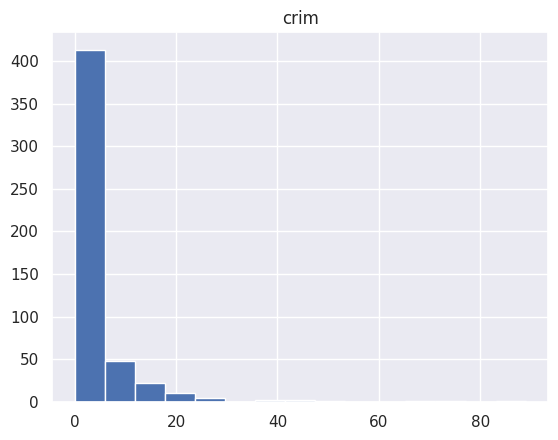

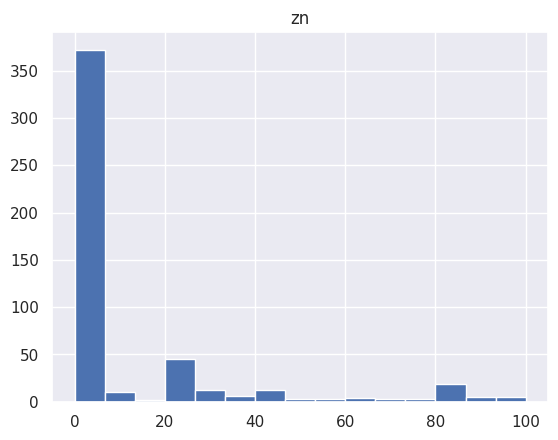

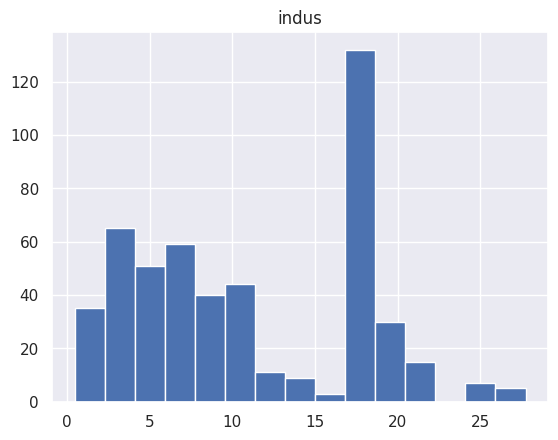

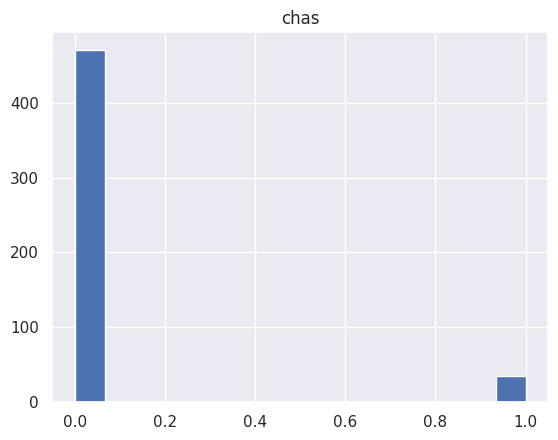

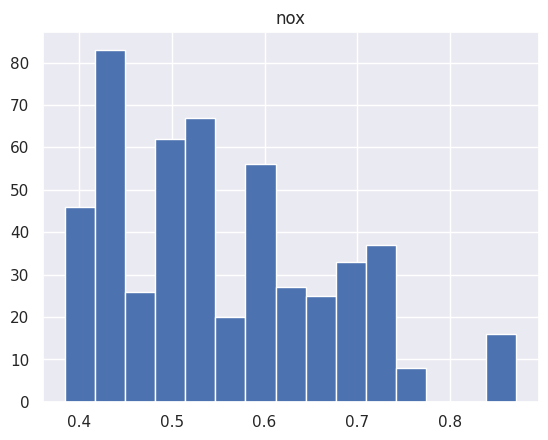

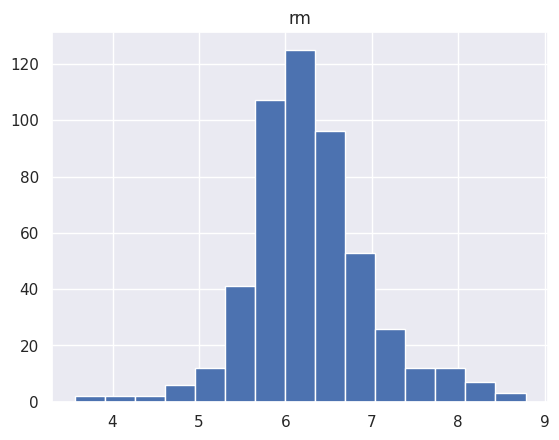

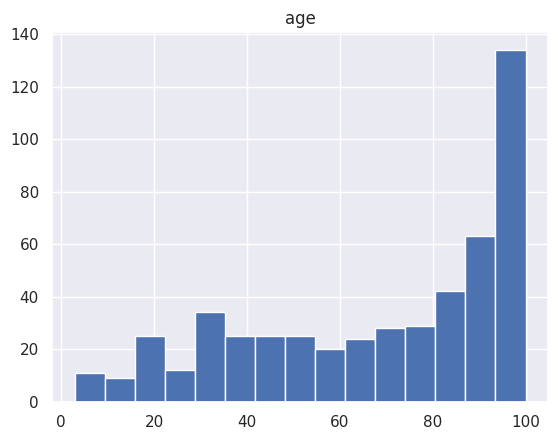

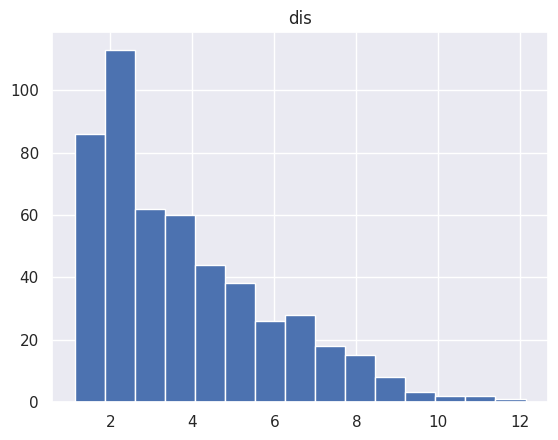

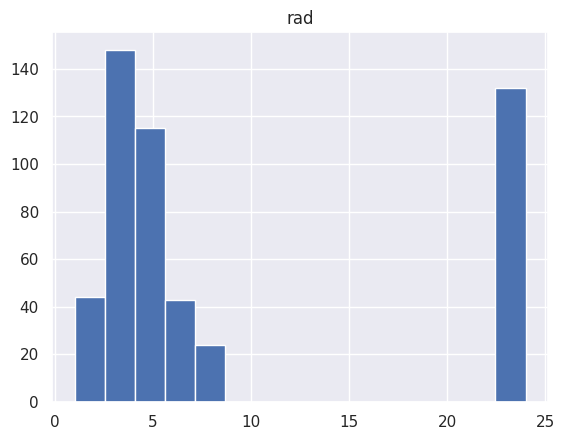

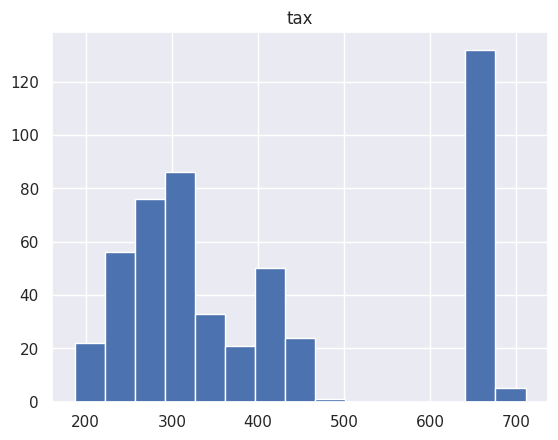

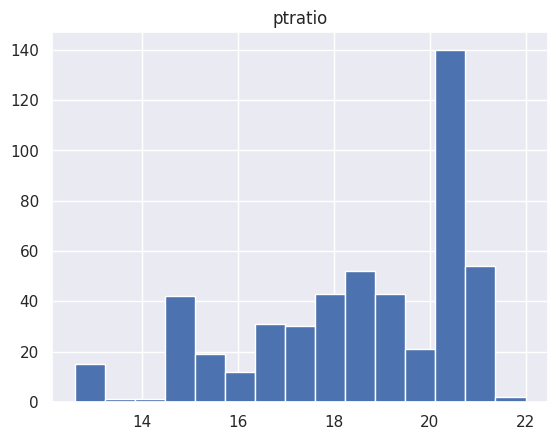

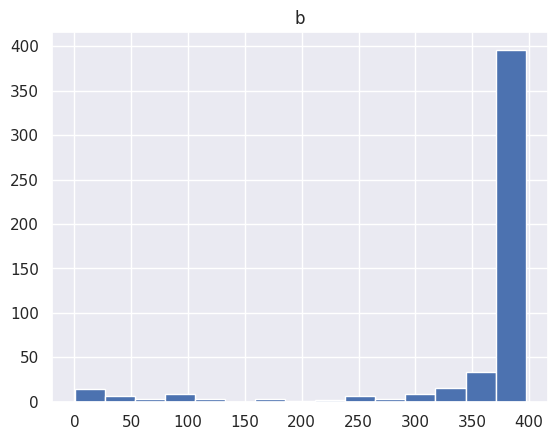

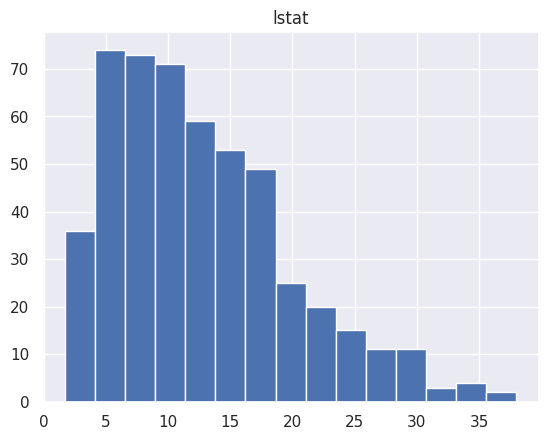

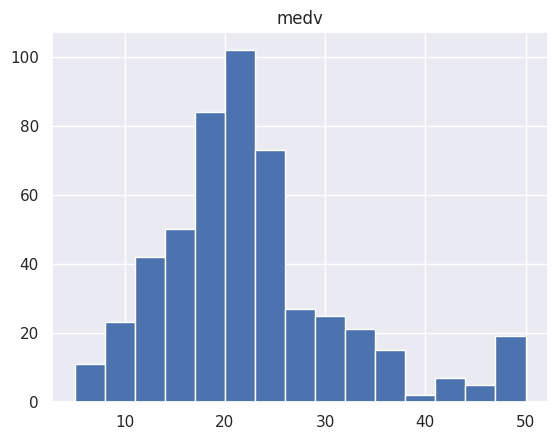

In [18]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Looping through the columns and create histograms
for col_name in df.columns:
    # Extracting the column and convert it to a list
    col_data = df.select(col_name).rdd.flatMap(lambda x: x).collect()

    # Creating a histogram
    plt.hist(col_data, bins=15)
    plt.title(col_name)
    plt.show()

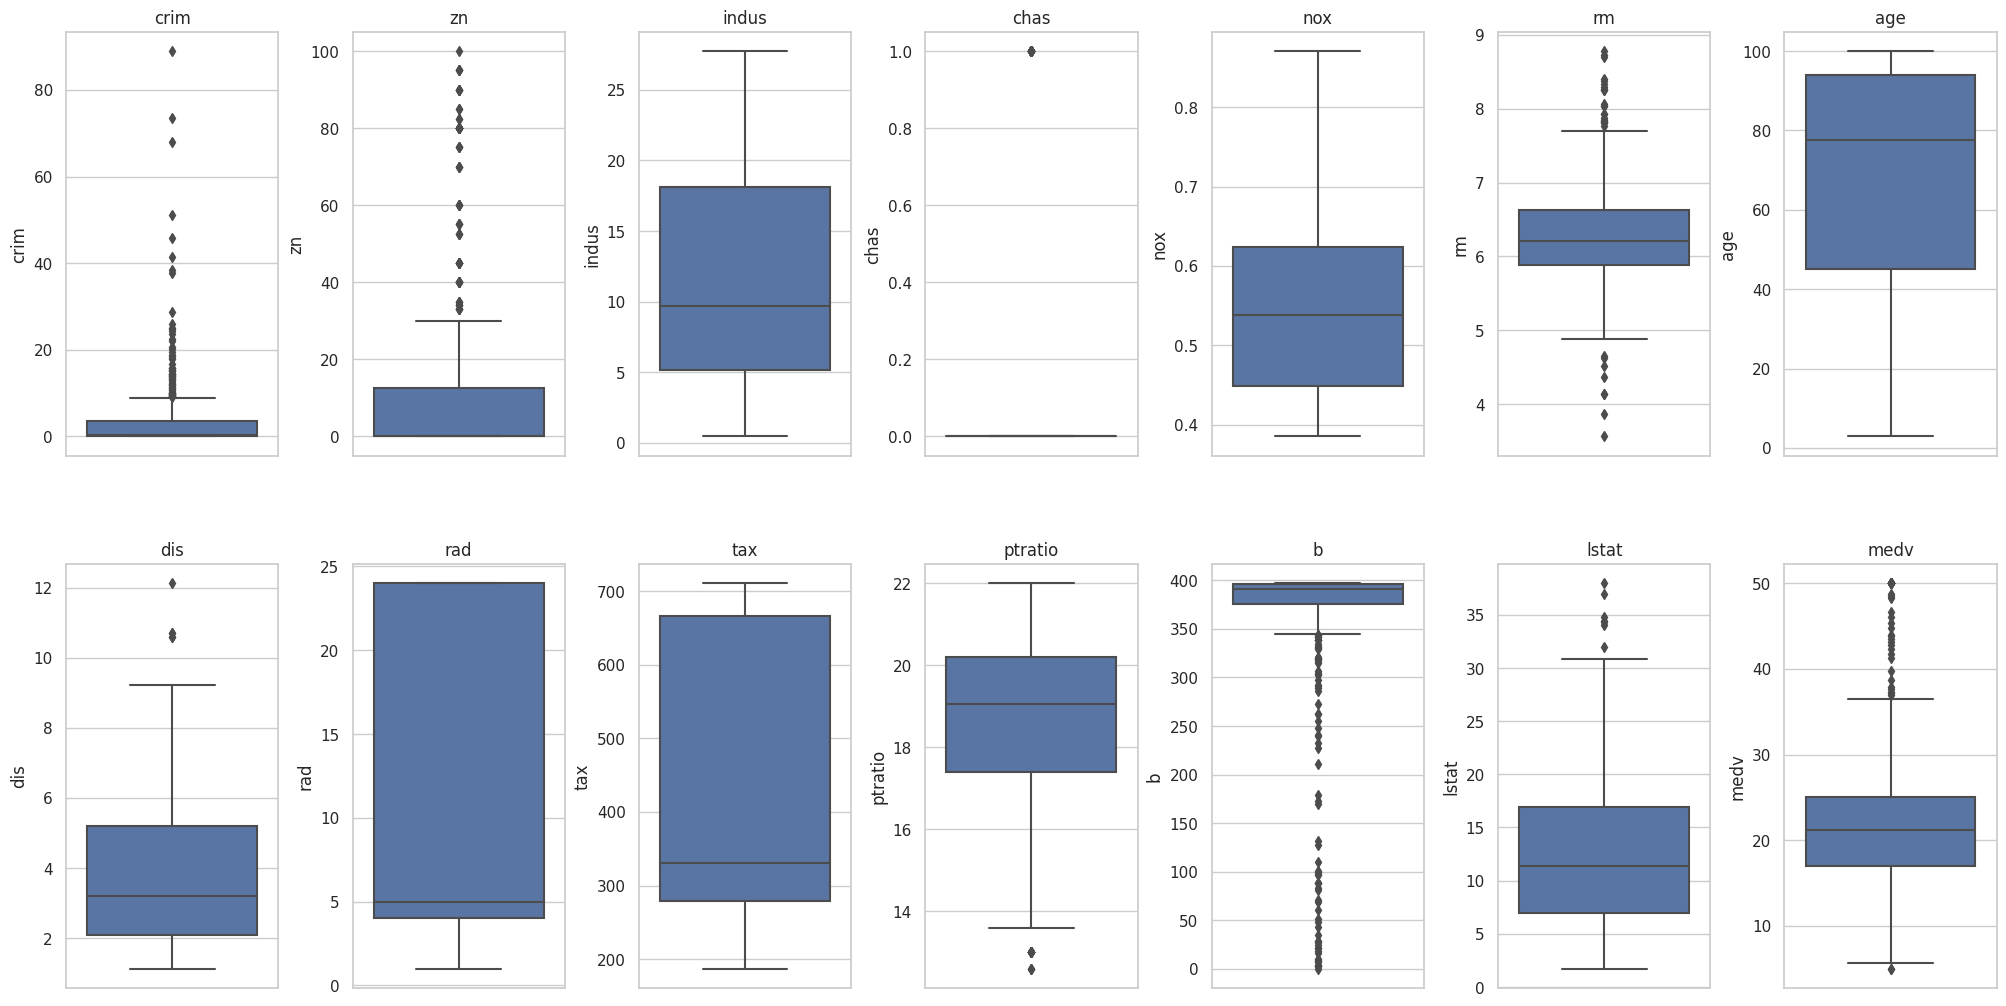

In [ ]:
#fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
#index = 0
#axs = axs.flatten()
#for k,v in df.items():
#    sns.boxplot(y=k, data=df, ax=axs[index])
#    index += 1
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

numerical_columns = [col_name for col_name, data_type in df.dtypes if data_type in ['int', 'double']]

# Create subplots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()

# Loop through numerical columns and create box plots
for index, column in enumerate(numerical_columns):
    sns.boxplot(y=column, data=df.toPandas(), ax=axs[index])
    axs[index].set_title(column)

# Adjust subplot layout
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

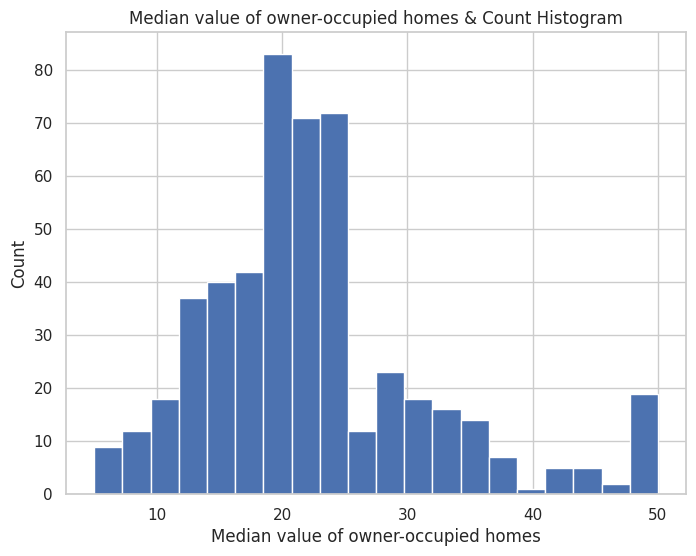

In [ ]:
cdf = 'medv'

# Creating a histogram using Spark's `histogram` method
hist_data = df.select(cdf).rdd.flatMap(lambda x: x).collect()

# Plotting the histogram in the local environment
plt.figure(figsize=(8, 6))
plt.hist(hist_data, bins=20)
plt.title('Median value of owner-occupied homes & Count Histogram')
plt.xlabel('Median value of owner-occupied homes')
plt.ylabel('Count')
plt.show()

<ipython-input-87-fe1cddbe35a3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column_data)


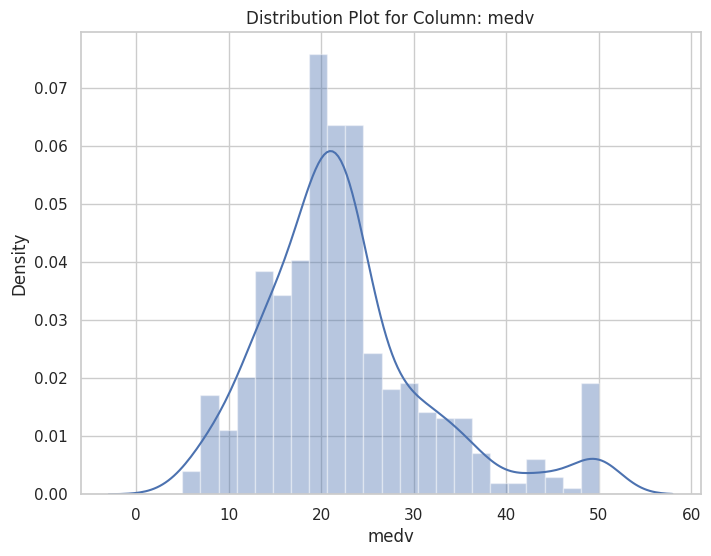

In [ ]:
column_name = 'medv'
column_data = df.select(column_name).rdd.flatMap(lambda x: x).collect()

# Create a distribution plot using Seaborn
plt.figure(figsize=(8, 6))
sns.distplot(column_data)
plt.title('Distribution Plot for Column: ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Density')
plt.show()





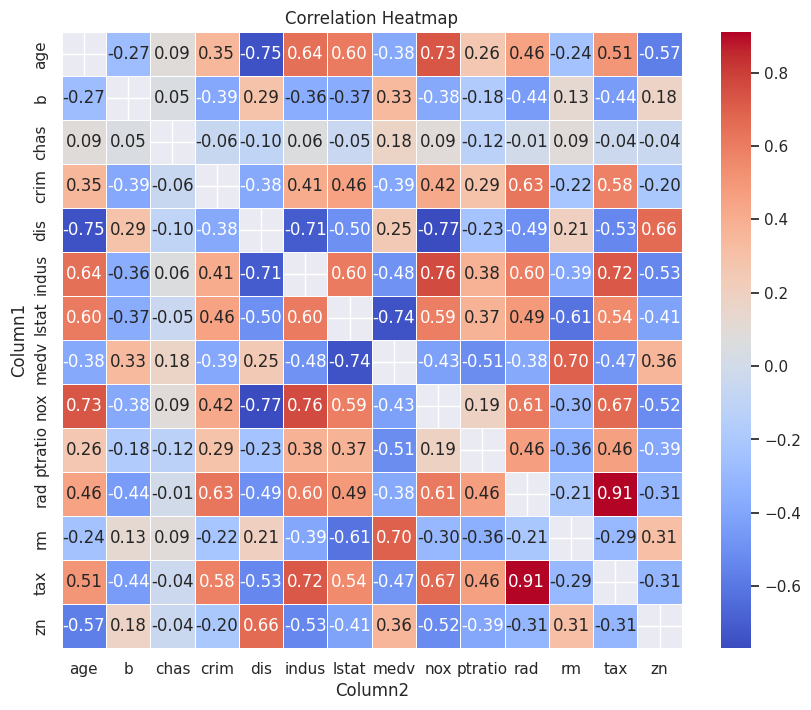

In [20]:
from pyspark.ml.feature import VectorAssembler

numerical_columns = [col_name for col_name, data_type in df.dtypes if data_type in ['int', 'double']]

assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
df_assembled = assembler.transform(df)

# Calculate the correlation matrix for numerical columns
correlations = []
for col1 in numerical_columns:
    for col2 in numerical_columns:
        if col1 != col2:
            corr_value = df_assembled.stat.corr(col1, col2)
            correlations.append((col1, col2, corr_value))

corr_df = pd.DataFrame(correlations, columns=["Column1", "Column2", "Correlation"])

# Create a pivot table to format the correlation matrix
pivot_corr_df = corr_df.pivot(index="Column1", columns="Column2", values="Correlation")

# Plot the correlation heatmap using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
idp = df.columns
idp

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

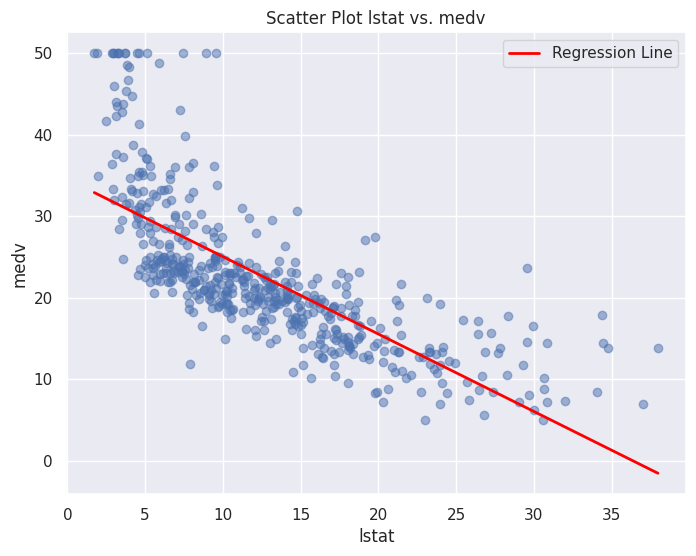

In [21]:
#sns.lmplot(x = 'lstat', y = 'medv', data = df);
from pyspark.ml.regression import LinearRegression

# Assuming 'df' is your DataFrame
x_column = 'lstat'
y_column = 'medv'

# Create a VectorAssembler
assembler = VectorAssembler(inputCols=[x_column], outputCol="features")
df_assembled = assembler.transform(df)

# Fit a linear regression model
lr = LinearRegression(featuresCol="features", labelCol=y_column)
lr_model = lr.fit(df_assembled)

# Get the coefficients and intercept
coefficients = lr_model.coefficients[0]
intercept = lr_model.intercept

# Collect the data to the local environment
x_data = df.select(x_column).rdd.flatMap(lambda x: x).collect()
y_data = df.select(y_column).rdd.flatMap(lambda x: x).collect()

# Create points for the regression line
x_regression_line = np.array([min(x_data), max(x_data)])
y_regression_line = coefficients * x_regression_line + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, alpha=0.5)
plt.plot(x_regression_line, y_regression_line, color='red', linewidth=2, label='Regression Line')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot {x_column} vs. {y_column}')
plt.legend()
plt.show()

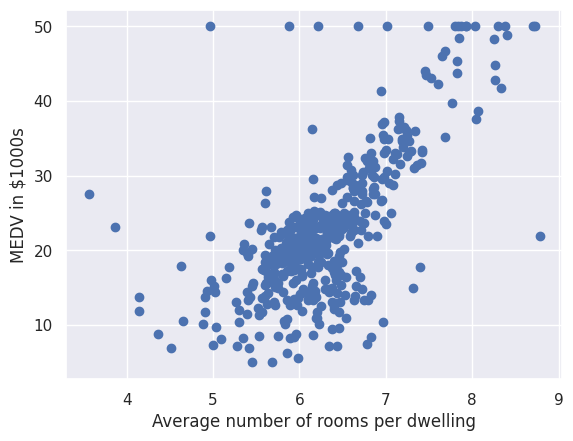

In [24]:
plt.scatter(df.select('rm').rdd.flatMap(lambda x: x).collect(), df.select('medv').rdd.flatMap(lambda x: x).collect())
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('MEDV in $1000s')
plt.show()

In [25]:
#plt.hist(df.select('medv').rdd.flatMap(lambda x: x).collect(), bins=20)
#plt.xlabel('Median value of owner-occupied homes in $1000s')
#plt.ylabel('Frequency')
#plt.show()


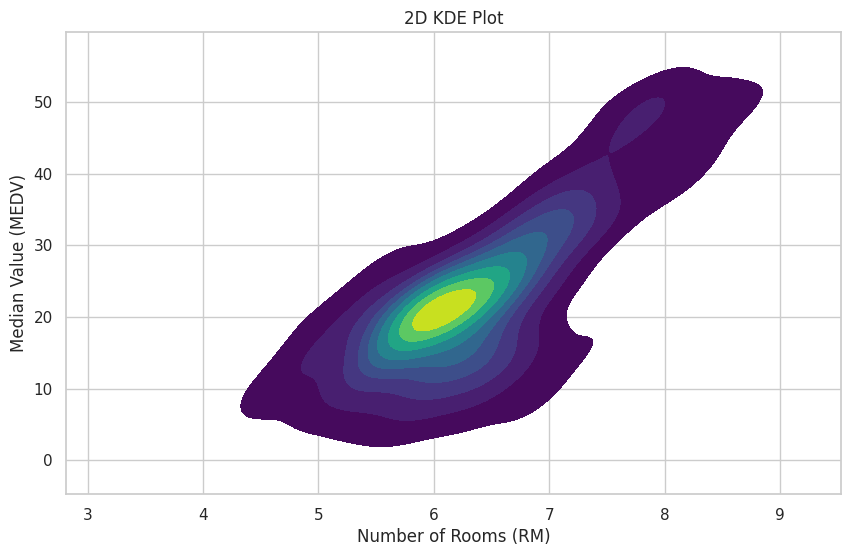

In [ ]:
# Create a 2D KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df.toPandas(), x="rm", y="medv", cmap="viridis", fill=True)
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("Median Value (MEDV)")
plt.title("2D KDE Plot")
plt.show()

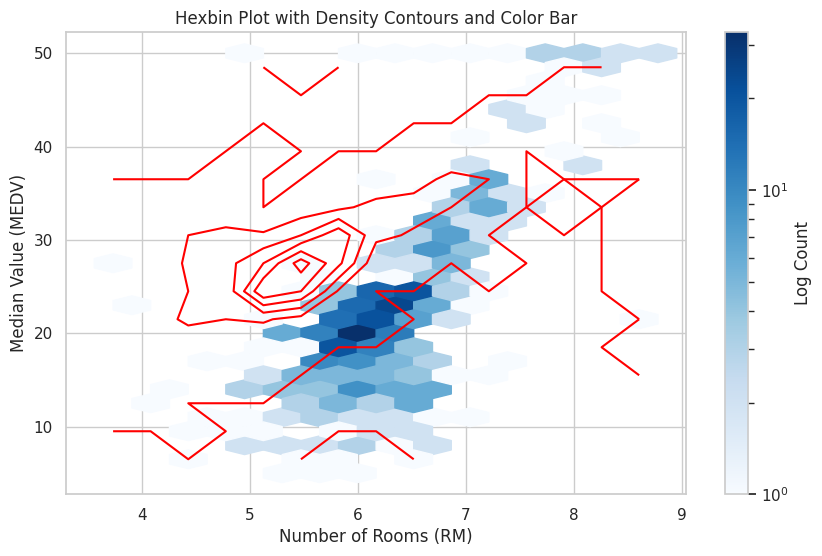

In [ ]:
from scipy.stats import binned_statistic_2d

# Extract RM and MEDV columns as NumPy arrays
rm = df.select("rm").rdd.flatMap(lambda x: x).collect()
medv = df.select("medv").rdd.flatMap(lambda x: x).collect()

# Create a hexbin plot with density contours and color bar
plt.figure(figsize=(10, 6))
hb = plt.hexbin(rm, medv, gridsize=(15, 15), cmap="Blues", bins="log", mincnt=1, extent=(min(rm), max(rm), min(medv), max(medv)))
plt.colorbar(hb, label="Log Count")

# Calculate density contours using binned_statistic_2d
statistic, x_edge, y_edge, binnumber = binned_statistic_2d(rm, medv, None, statistic="count", bins=(15, 15))
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])
X, Y = np.meshgrid(x_center, y_center)
plt.contour(X, Y, statistic, levels=5, colors="red")

plt.xlabel("Number of Rooms (RM)")
plt.ylabel("Median Value (MEDV)")
plt.title("Hexbin Plot with Density Contours and Color Bar")
plt.show()

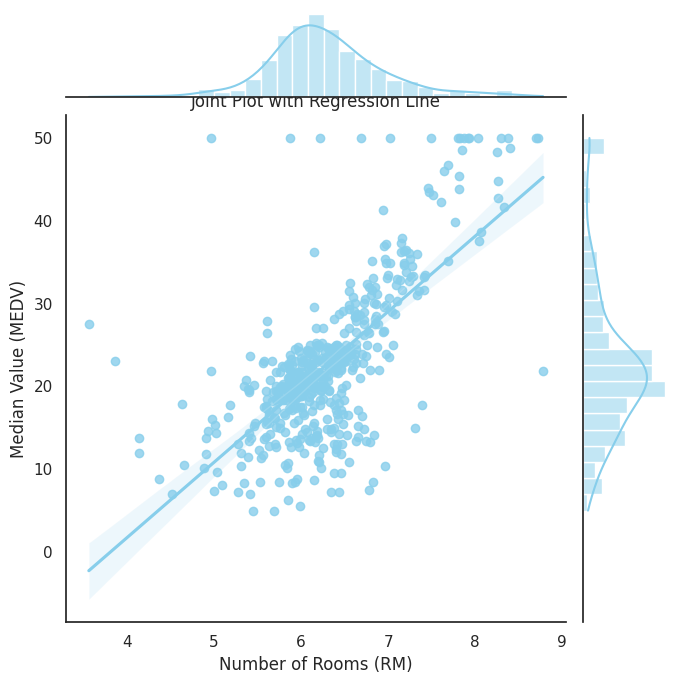

In [ ]:
# Create a joint plot with regression line
sns.set(style="white")
g = sns.jointplot(data=df.toPandas(), x="rm", y="medv", kind="reg", height=7, color="skyblue")
g.ax_joint.set_xlabel("Number of Rooms (RM)")
g.ax_joint.set_ylabel("Median Value (MEDV)")
g.ax_joint.set_title("Joint Plot with Regression Line")
plt.show()

In [28]:
# Define the bin column in df_1
from pyspark.sql.functions import col, when
df_1 = df.withColumn("RM_BIN", when(col("rm") <= 5, "Bin 1")
                     .when((col("rm") > 5) & (col("rm") <= 6), "Bin 2")
                     .when((col("rm") > 6) & (col("rm") <= 7), "Bin 3")
                     .when((col("rm") > 7) & (col("rm") <= 8), "Bin 4")
                     .otherwise("Bin 5"))

# Group by the bin column and calculate statistics
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Define a window specification for calculating the median
window_spec = Window.partitionBy("RM_BIN").orderBy("medv")

agg_df = df_1.withColumn("row_num", F.row_number().over(window_spec)).groupBy("RM_BIN").agg(
    F.mean("medv").alias("Mean_MEDV"),
    F.expr("percentile_approx(medv, 0.5)").alias("Median_MEDV"),
    F.count("medv").alias("Count_MEDV")
).orderBy("RM_BIN")

# Show the result
agg_df.show()


+------+------------------+-----------+----------+
|RM_BIN|         Mean_MEDV|Median_MEDV|Count_MEDV|
+------+------------------+-----------+----------+
| Bin 1|          16.64375|       13.8|        16|
| Bin 2| 17.55159235668789|       18.6|       157|
| Bin 3| 22.01598513011151|       22.2|       269|
| Bin 4|36.917647058823526|       35.2|        51|
| Bin 5|              44.2|       48.3|        13|
+------+------------------+-----------+----------+



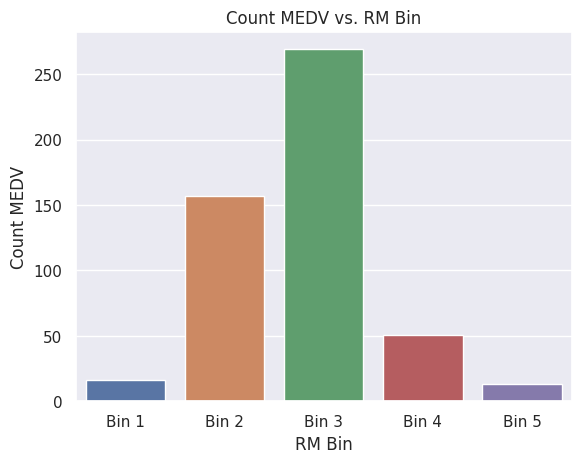

In [35]:
# Plot a bar chart for Count_MEDV vs. RM_bin
sns.barplot(x="RM_BIN", y="Count_MEDV", data=agg_df.toPandas())
plt.xlabel("RM Bin")
plt.ylabel("Count MEDV")
plt.title("Count MEDV vs. RM Bin")
plt.show()

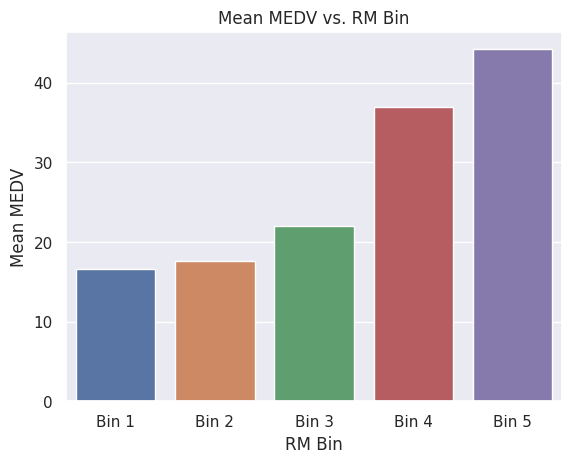

In [32]:
# Plot a bar chart for Mean_MEDV vs. RM_bin
sns.barplot(x="RM_BIN", y="Mean_MEDV", data=agg_df.toPandas())
plt.xlabel("RM Bin")
plt.ylabel("Mean MEDV")
plt.title("Mean MEDV vs. RM Bin")
plt.show()


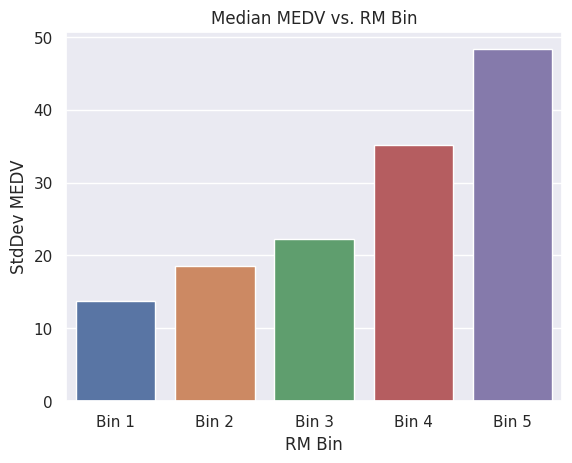

In [34]:
# Plot a bar chart for StdDev_MEDV vs. RM_bin
sns.barplot(x="RM_BIN", y="Median_MEDV", data=agg_df.toPandas())
plt.xlabel("RM Bin")
plt.ylabel("StdDev MEDV")
plt.title("Median MEDV vs. RM Bin")
plt.show()

In [ ]:
sc.stop()

In [ ]:
spark.sparkContext.stop()